In [29]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import sys
sys.path.append('../src')

from utils import run_cmd

In [1]:
def load_profile(file):
    return pd.read_csv(file, sep='\t', header=0, names=['locus_id', 'allele_id'], index_col=0).fillna('')

In [20]:
base_dirname = Path("/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/sim/EGD-e/")
profile_dirname = base_dirname/'profile'
ref_filename = base_dirname/'reference.tsv'

In [21]:
reference = load_profile(ref_filename)

data = []
for query_filename in profile_dirname.iterdir():
    query = load_profile(query_filename)
    distance = (query['allele_id'].values != reference['allele_id'].values).sum()
    data.append((query_filename.stem, distance))

df = pd.DataFrame(data, columns=['sample_name', 'cgmlst_distance']).sort_values('sample_name')

In [22]:
df.loc[:, 'depth'], df.loc[:, 'repaet'] = df['sample_name'].str.split('-').str
df['depth'] = df['depth'].str.strip('0').str.replace('x', '')

/home/chen1i6c04/miniconda3/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'cgmslt distance')

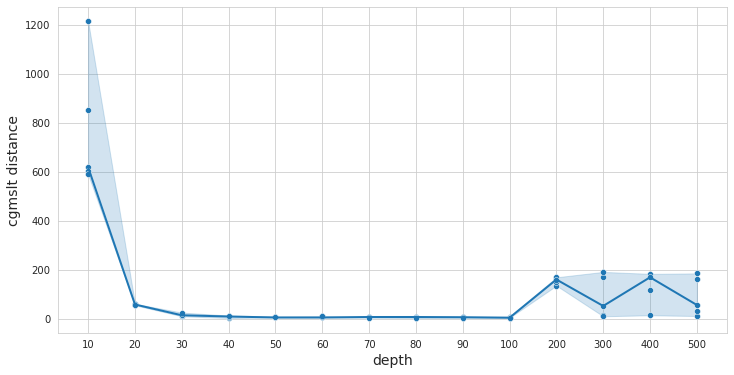

In [23]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='depth', y='cgmlst_distance', data=df, ax=ax, lw=2, estimator=np.median)
sns.scatterplot(x='depth', y='cgmlst_distance', data=df, ax=ax)
ax.set_xlabel('depth', fontsize=14)
ax.set_ylabel('cgmslt distance', fontsize=14)

In [24]:
fig.savefig(base_dirname/'distance_change.png', bbox_inches='tight', facecolor='w', dpi=150)

In [25]:
df.to_csv(base_dirname/'stats.txt', sep='\t', index=False)

In [26]:
dirpaths = """/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/sim/EGD-e
/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/sim/LT2
/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/sim/N16961
"""

In [32]:
with pd.ExcelWriter('/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/sim/report.xlsx') as writer:
    for dirpath in dirpaths.split():
        df = pd.read_csv(os.path.join(dirpath, 'stats.txt'), sep='\t')
        df = df.pivot('depth', 'repaet', 'cgmlst_distance')
        df.columns = 'repeat_' + df.columns.astype(str)
        df['mean'] = df.apply(lambda x: x.mean(), axis=1)
        df.to_excel(writer, index=True, sheet_name=os.path.basename(dirpath))